Nature of the Data - Yulu Bike Sharing Dataset

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data
yulu_data_set = pd.read_csv('yulu_bike_sharing_dataset.csv') 

# Show first entries
yulu_data_set.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
# Split the 'datetime' column into 'date' and 'time' columns
yulu_data_set[['date', 'time']] = yulu_data_set['datetime'].str.split(' ', expand=True)
yulu_data_set = yulu_data_set.drop(columns=['datetime'])

# Show the first few entries to verify the split
yulu_data_set.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count        date      time  
0       3          13     16  2011-01-01  00:00:00  
1       8          32     40  2011-01-01  01:00:00  
2       5          27     32  2011-01-01  02:00:00  
3       3          10     13  2011-01-01  03:00:00  
4       0           1      1  2011-01-01  04:00:00

## Data Info

In [4]:
print("Data Info")
print(yulu_data_set.info())

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  date        10886 non-null  object 
 12  time        10886 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB
None


## Data Description

In [5]:
print("Data description:")
print(yulu_data_set.describe()) #Data visualization -> Mean etc.

Data description:
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.1

Numeric Variables

- temp: Temperature (Celsius)
- atemp: Felt temperature (Celsius)
- humidity: Humidity
- windspeed: Wind speed
- casual: Count of casual users
- registered: Count of registered users
- count: Count of total rental bikes (casual and registered)

Chategorical Variables (to be encoded in preprocessing)

- datetime: Datetime -> split into date and time
- season: Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)
- holiday: Holiday or not (0 or 1)
- workingday: Workday (0 or 1)
- weather: (1: Fair Weather, 2: Misty Conditions, 3: Light Precipitation, 4: Severe Weather)

In [6]:
# Checking for missing values in each column
missing_values = yulu_data_set.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
time          0
dtype: int64


Visualization of Numerical Variables

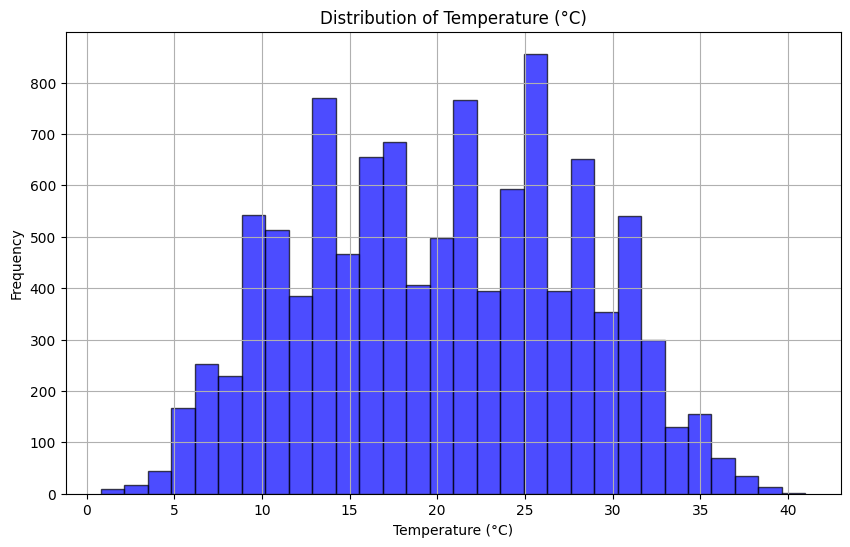

Mean Temperature (째C): 20.23085981995223


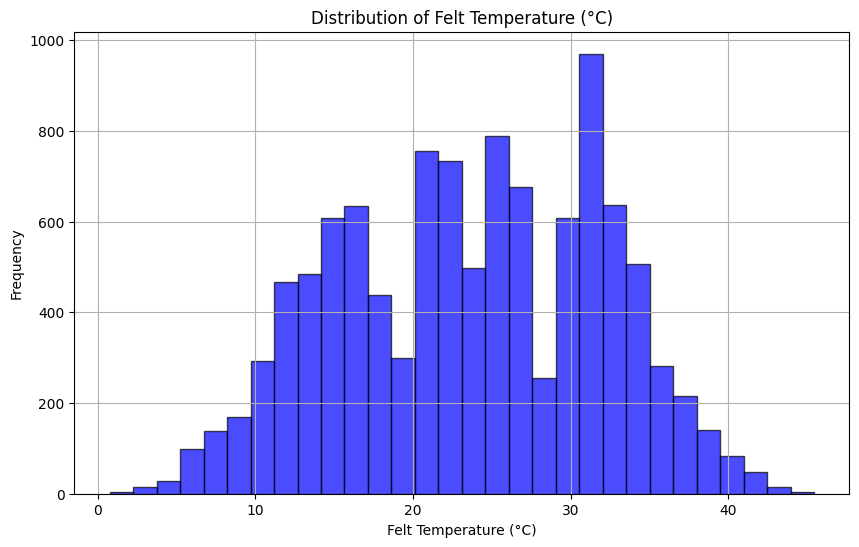

Mean Felt Temperature (째C): 23.655084052912


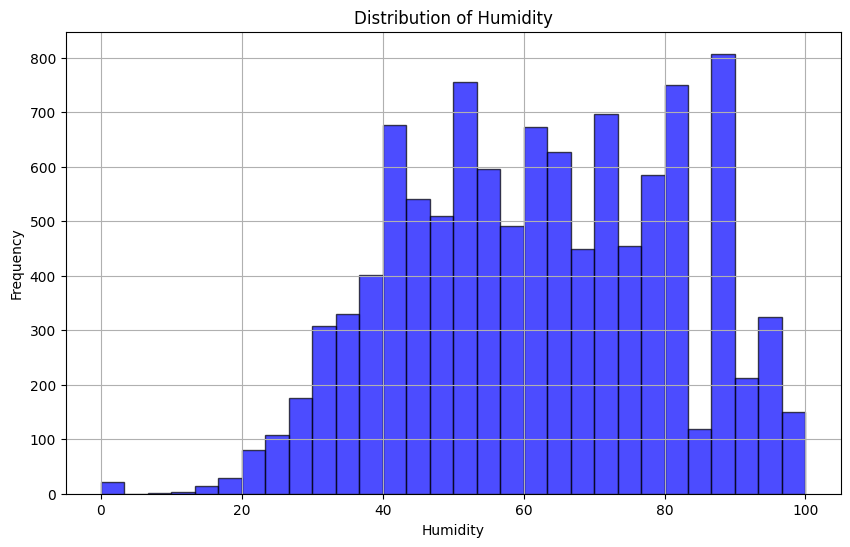

Mean Humidity: 61.88645967297446


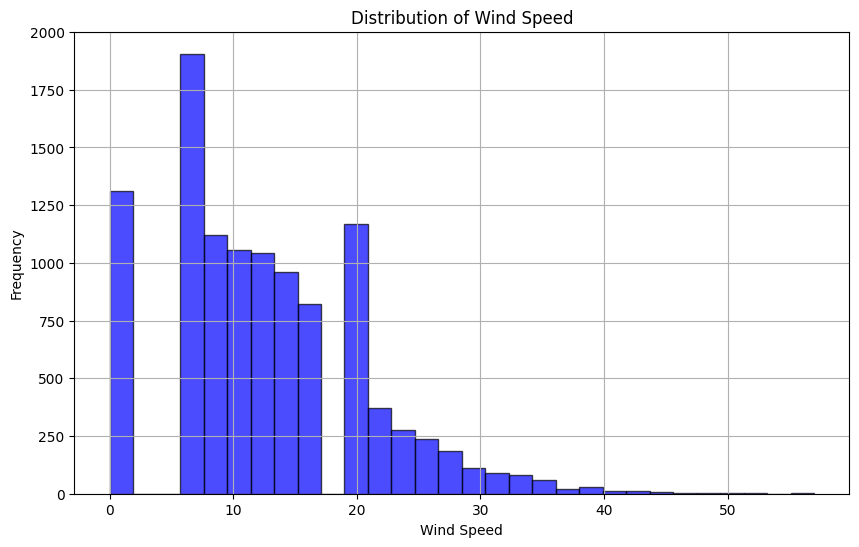

Mean Wind Speed: 12.7993954069447


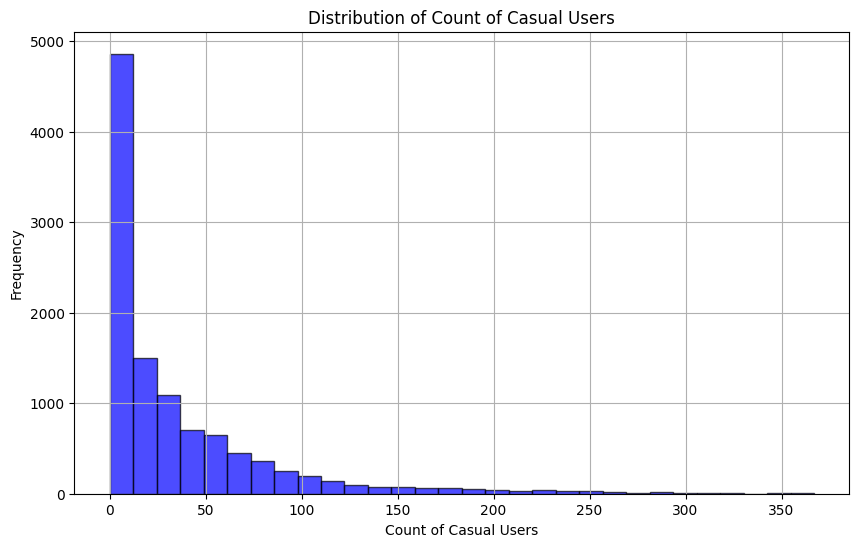

Mean Count of Casual Users: 36.02195480433584


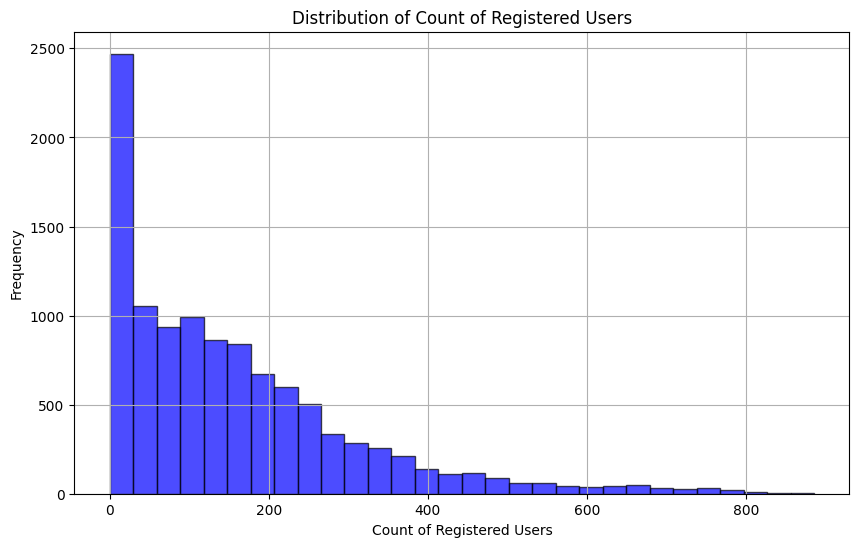

Mean Count of Registered Users: 155.5521771082124


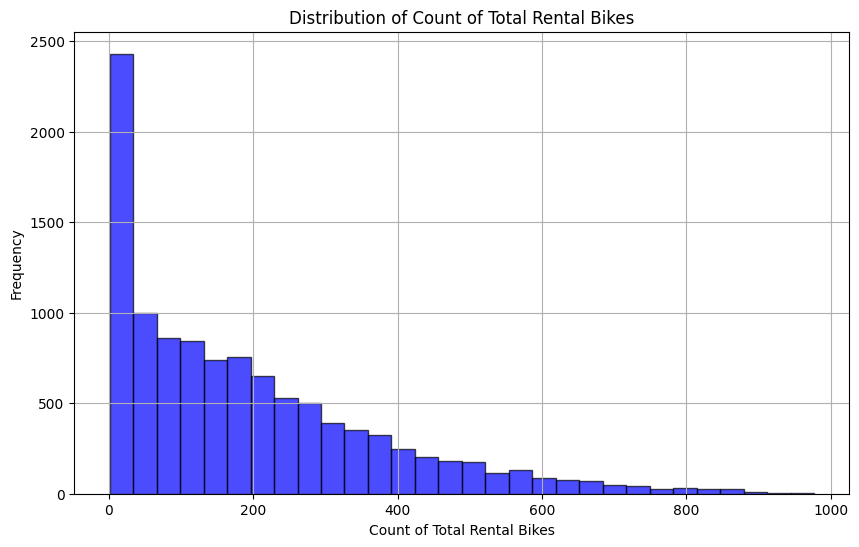

Mean Count of Total Rental Bikes: 191.57413191254824


In [7]:
# Define function to visualize distribution and calculate mean
def visualize_and_calculate_mean(column_name, xlabel):
    plt.figure(figsize=(10, 6))
    plt.hist(yulu_data_set[column_name], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {xlabel}')
    plt.grid(True)
    plt.show()
    
    mean_value = yulu_data_set[column_name].mean()
    print(f"Mean {xlabel}: {mean_value}")

# Variables 
variables = {
    'temp': 'Temperature (째C)',
    'atemp': 'Felt Temperature (째C)',
    'humidity': 'Humidity',
    'windspeed': 'Wind Speed',
    'casual': 'Count of Casual Users',
    'registered': 'Count of Registered Users',
    'count': 'Count of Total Rental Bikes'
}

# Iterate through each item in variables dictionary and call function for each variable
for column, label in variables.items():
    visualize_and_calculate_mean(column, label)

Visualization of Categorical Variables 

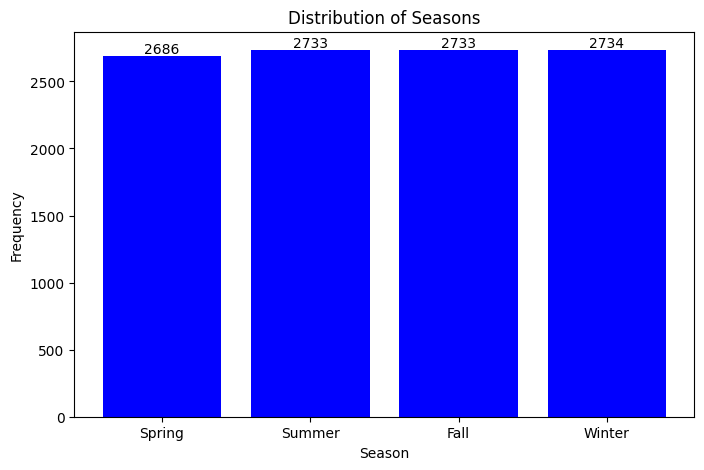

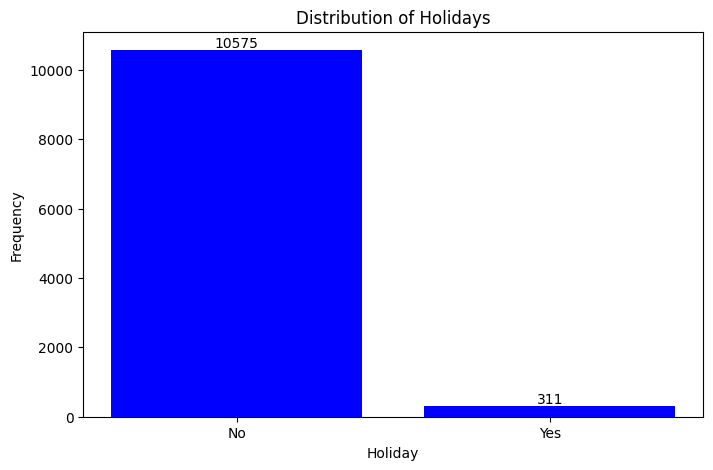

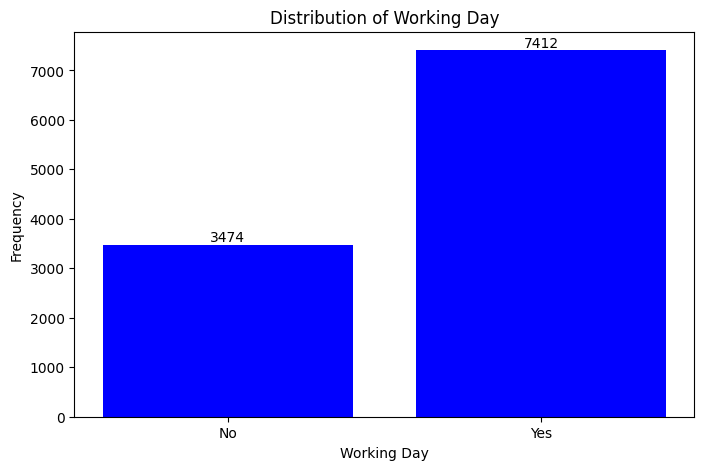

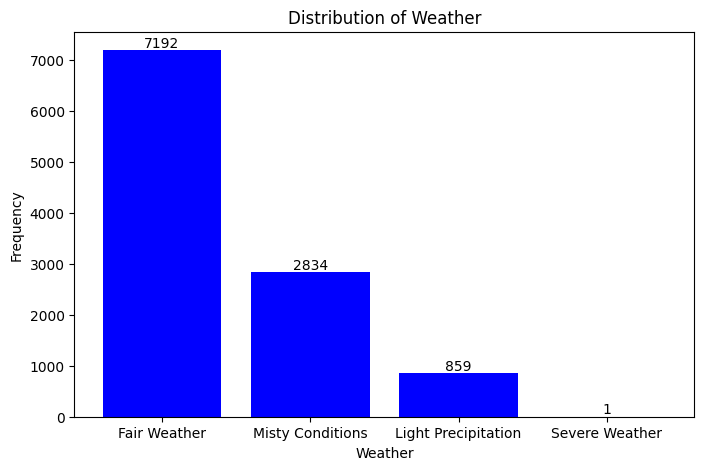

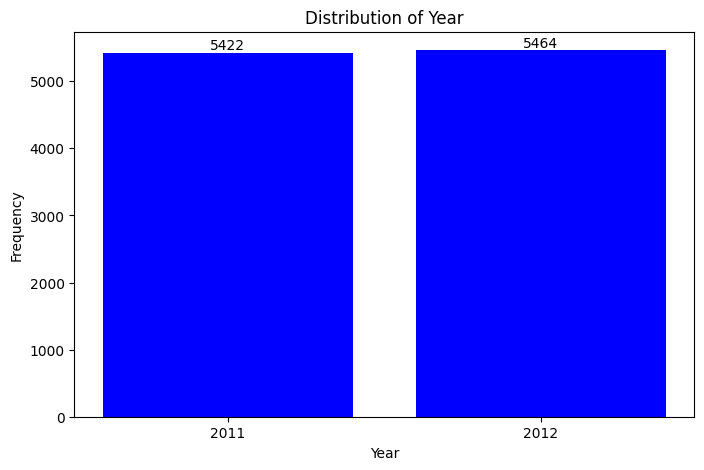

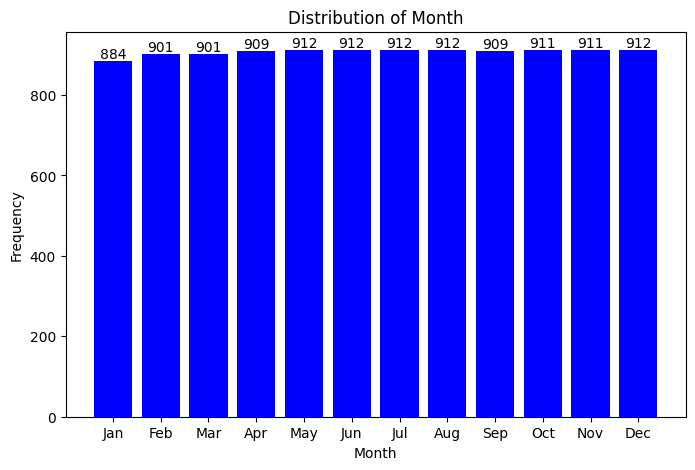

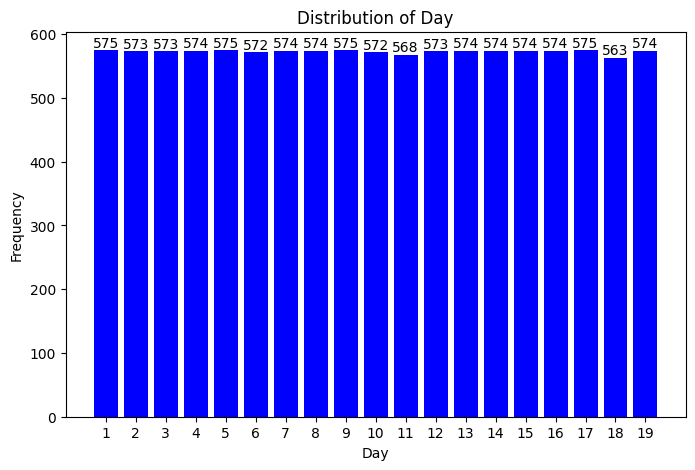

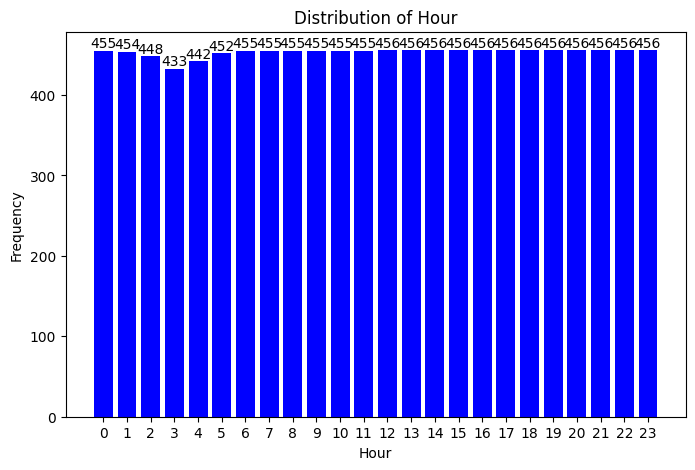

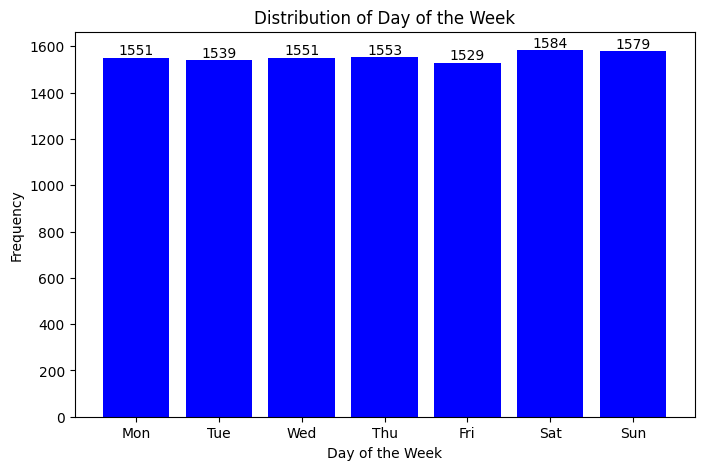

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' column is of datetime type
yulu_data_set['date'] = pd.to_datetime(yulu_data_set['date'])

# Extract components from 'date'
yulu_data_set['year'] = yulu_data_set['date'].dt.year
yulu_data_set['month'] = yulu_data_set['date'].dt.month
yulu_data_set['day'] = yulu_data_set['date'].dt.day
yulu_data_set['dayofweek'] = yulu_data_set['date'].dt.dayofweek

# Ensure 'time' column is of datetime type and extract hour
yulu_data_set['time'] = pd.to_datetime(yulu_data_set['time'], format='%H:%M:%S')
yulu_data_set['hour'] = yulu_data_set['time'].dt.hour

# Define a function to plot distributions
def plot_distribution(data, labels, xlabel, ylabel, title, color='blue'):
    counts = data.value_counts().sort_index()
    plt.figure(figsize=(8, 5))
    bars = plt.bar(counts.index, counts, color=color)
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(count), ha='center', va='bottom')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(ticks=counts.index, labels=labels)
    plt.show()

# Dictionary to hold column names and their respective labels
distributions = {
    'season': (['Spring', 'Summer', 'Fall', 'Winter'], 'Season', 'Frequency', 'Distribution of Seasons'),
    'holiday': (['No', 'Yes'], 'Holiday', 'Frequency', 'Distribution of Holidays'),
    'workingday': (['No', 'Yes'], 'Working Day', 'Frequency', 'Distribution of Working Day'),
    'weather': (['Fair Weather', 'Misty Conditions', 'Light Precipitation', 'Severe Weather'], 'Weather', 'Frequency', 'Distribution of Weather'),
    'year': (yulu_data_set['year'].unique(), 'Year', 'Frequency', 'Distribution of Year'),
    'month': (['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 'Month', 'Frequency', 'Distribution of Month'),
    'day': (yulu_data_set['day'].unique(), 'Day', 'Frequency', 'Distribution of Day'),
    'hour': (yulu_data_set['hour'].unique(), 'Hour', 'Frequency', 'Distribution of Hour'),
    'dayofweek': (['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 'Day of the Week', 'Frequency', 'Distribution of Day of the Week')
}

# Plot all distributions
for column, (labels, xlabel, ylabel, title) in distributions.items():
    plot_distribution(yulu_data_set[column], labels, xlabel, ylabel, title)


Impact of Numerical Variables on Total Count

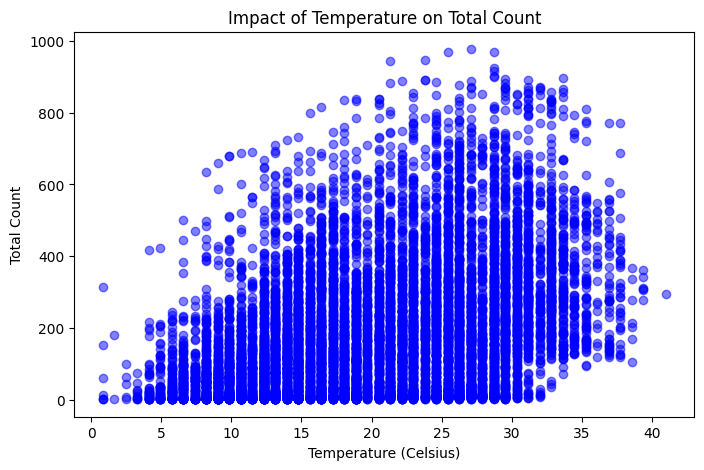

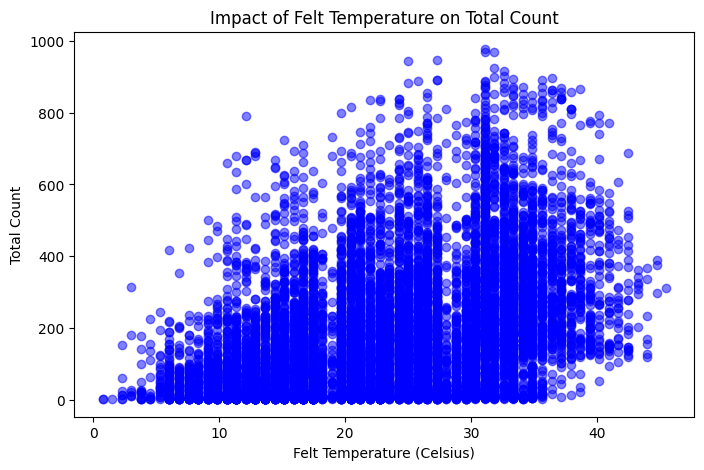

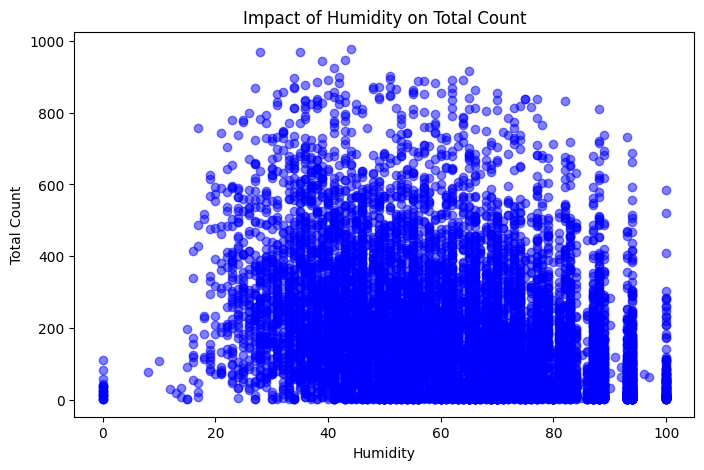

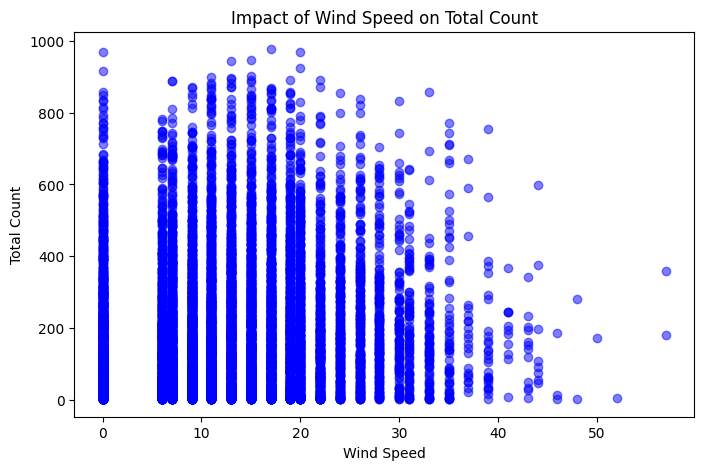

In [11]:
# Define a function to plot scatter plots
def plot_scatter(x, y, xlabel, ylabel, title, color='blue'):
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color=color, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Define a function to plot bar plots
def plot_bar(data, labels, xlabel, ylabel, title, color='blue'):
    counts = data.groupby(labels)['count'].mean()
    plt.figure(figsize=(8, 5))
    bars = plt.bar(counts.index, counts, color=color)
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(count, 2), ha='center', va='bottom')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(ticks=counts.index, labels=labels)
    plt.show()

# Plot scatter plots for continuous variables
plot_scatter(yulu_data_set['temp'], yulu_data_set['count'], 'Temperature (Celsius)', 'Total Count', 'Impact of Temperature on Total Count')
plot_scatter(yulu_data_set['atemp'], yulu_data_set['count'], 'Felt Temperature (Celsius)', 'Total Count', 'Impact of Felt Temperature on Total Count')
plot_scatter(yulu_data_set['humidity'], yulu_data_set['count'], 'Humidity', 'Total Count', 'Impact of Humidity on Total Count')
plot_scatter(yulu_data_set['windspeed'], yulu_data_set['count'], 'Wind Speed', 'Total Count', 'Impact of Wind Speed on Total Count')

Impact of Categorical Variables on Total Count

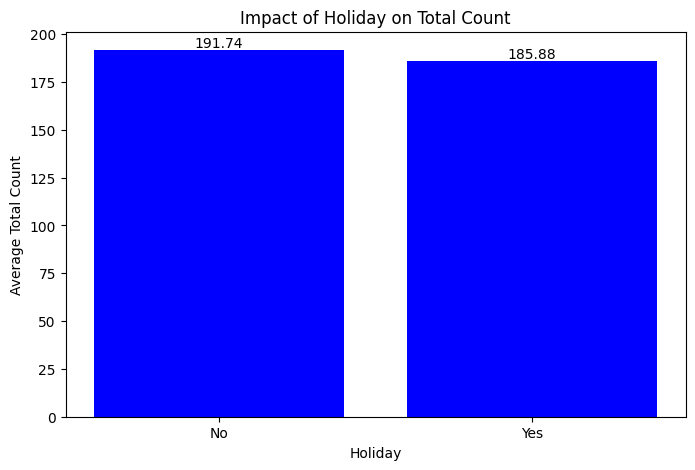

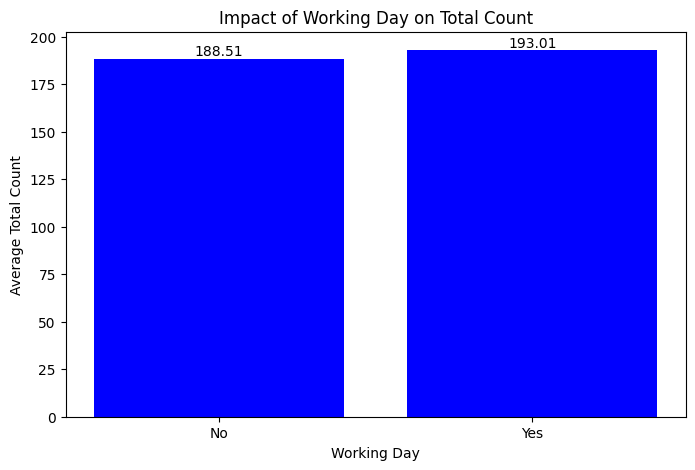

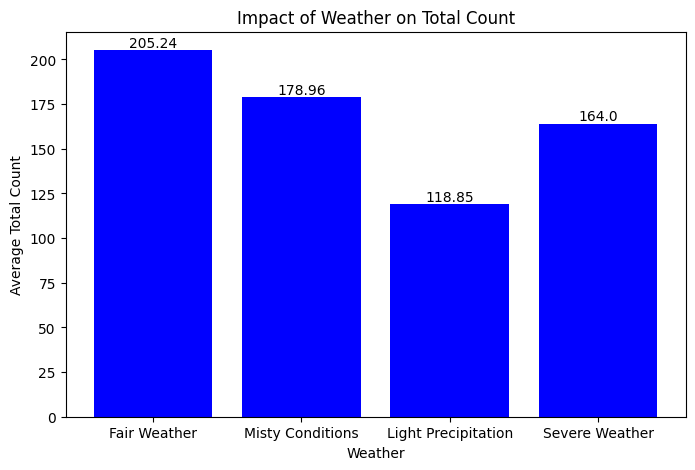

In [12]:
# Define a function to plot bar plots
def plot_categorical_impact(data, column, labels, xlabel, ylabel, title, color='blue'):
    counts = data.groupby(column)['count'].mean()
    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, counts, color=color)
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(count, 2), ha='center', va='bottom')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Plot bar plots for categorical variables
# Impact of holiday on total count
holiday_labels = ['No', 'Yes']
plot_categorical_impact(yulu_data_set, 'holiday', holiday_labels, 'Holiday', 'Average Total Count', 'Impact of Holiday on Total Count')

# Impact of workingday on total count
workday_labels = ['No', 'Yes']
plot_categorical_impact(yulu_data_set, 'workingday', workday_labels, 'Working Day', 'Average Total Count', 'Impact of Working Day on Total Count')

# Impact of weather on total count
weather_labels = ['Fair Weather', 'Misty Conditions', 'Light Precipitation', 'Severe Weather']
plot_categorical_impact(yulu_data_set, 'weather', weather_labels, 'Weather', 'Average Total Count', 'Impact of Weather on Total Count')

## Boxplots

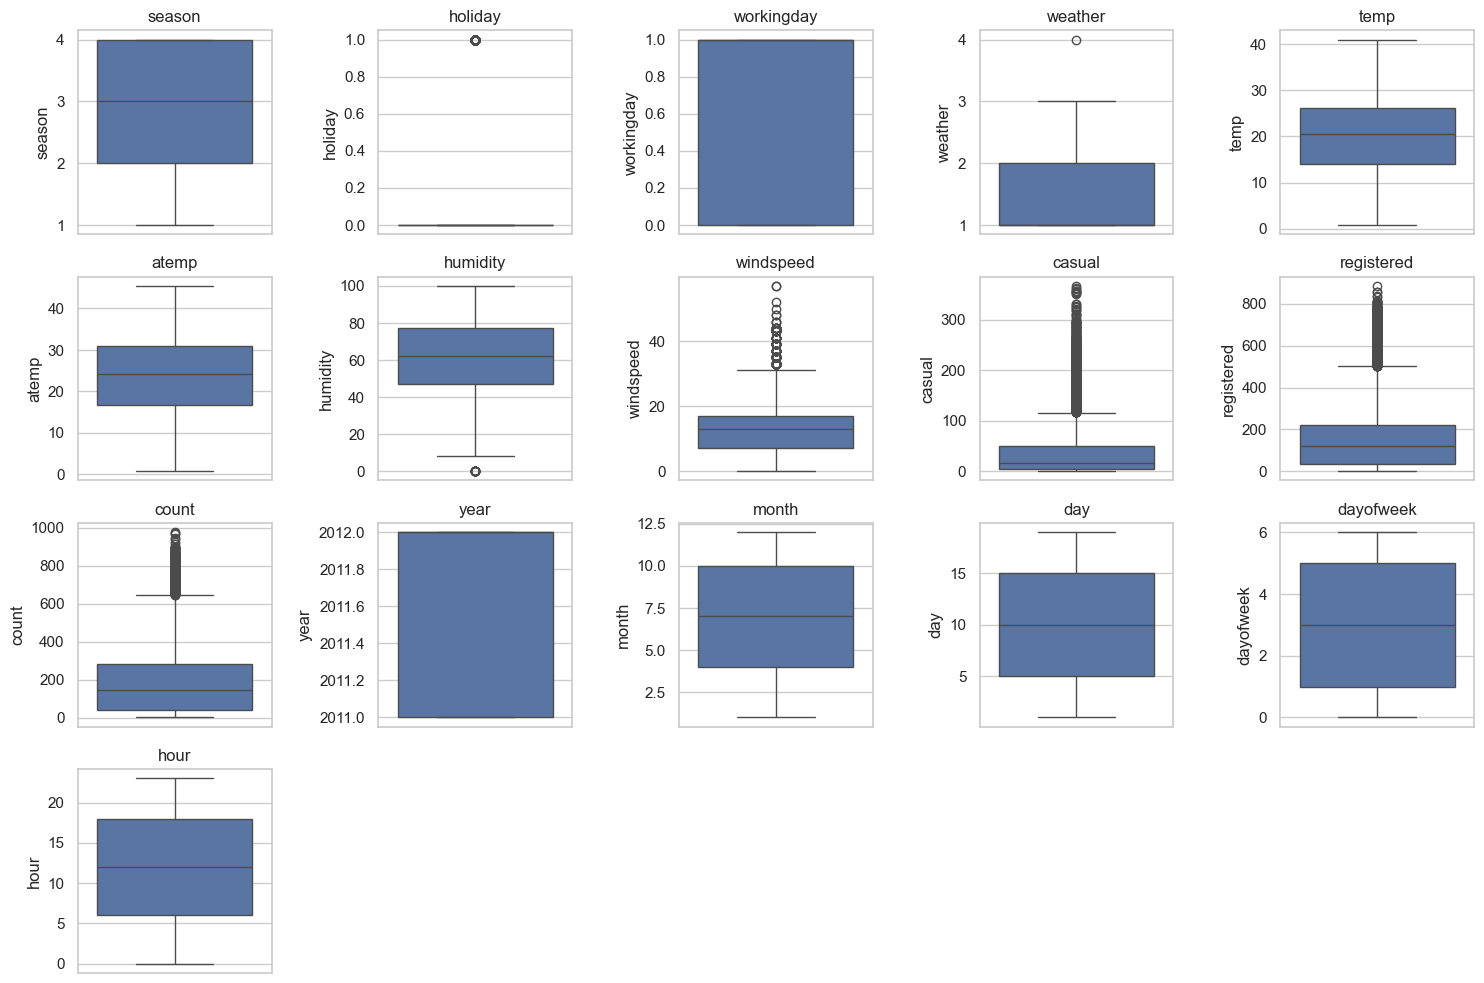

In [15]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a boxplot for each numerical column
plt.figure(figsize=(15, 10))

# Loop through each numerical column and create a boxplot
for i, column in enumerate(yulu_data_set.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(4, 5, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=yulu_data_set[column])
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

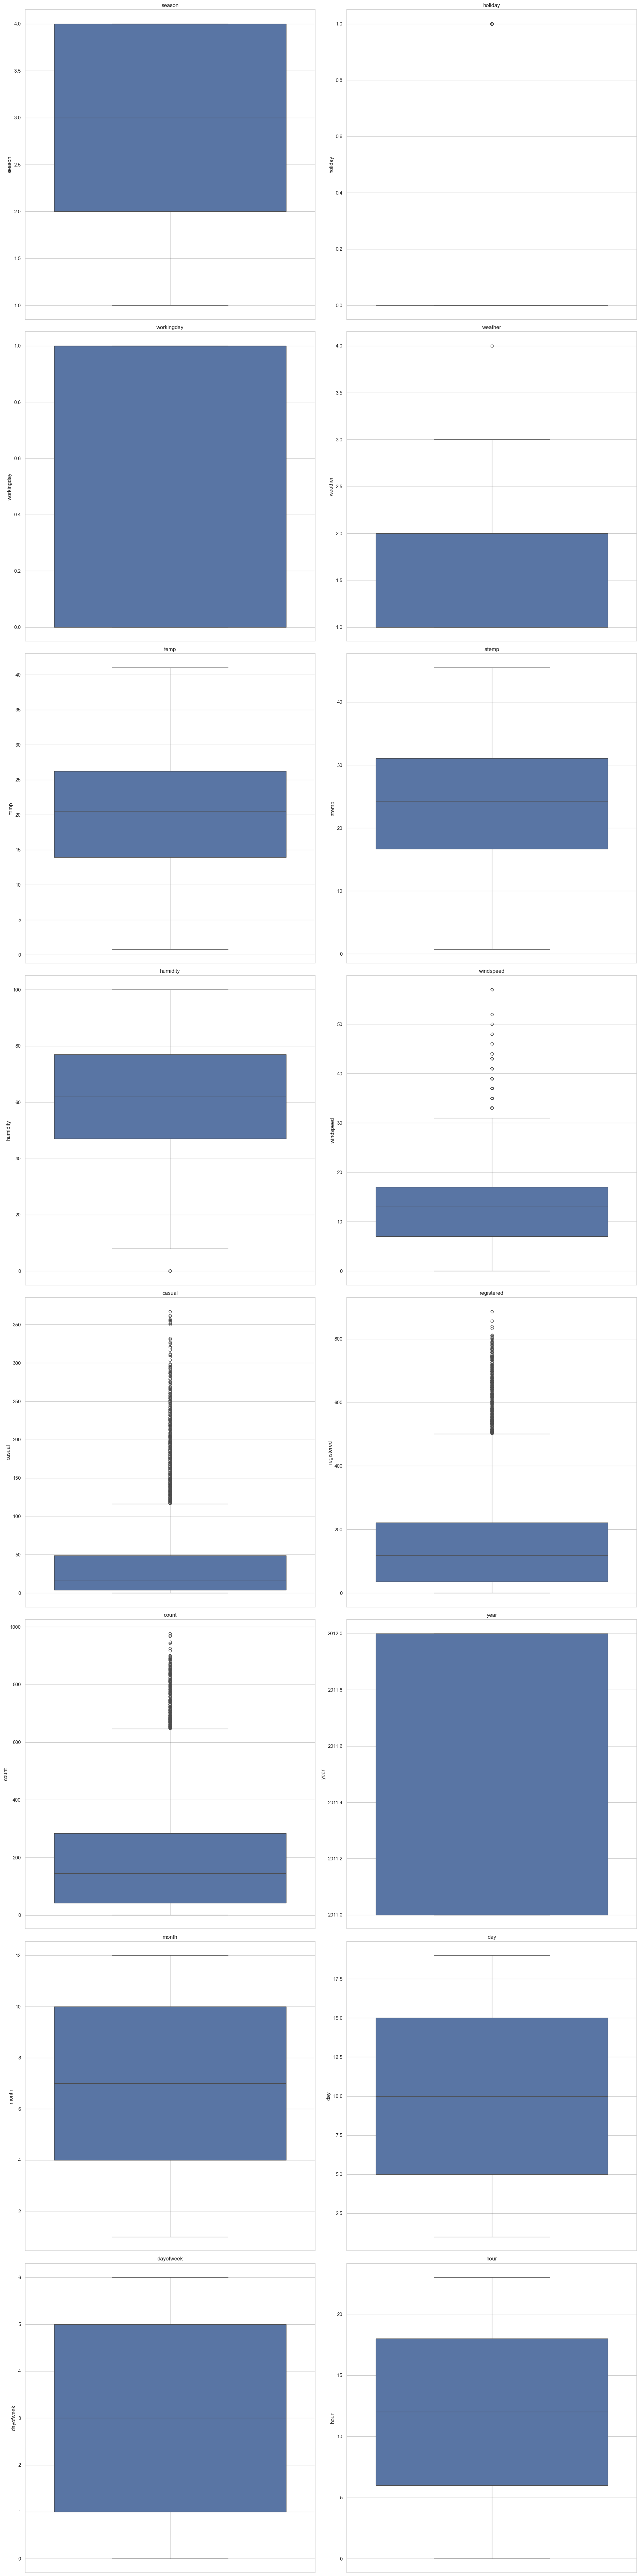

In [14]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Get the list of numerical columns
numerical_columns = yulu_data_set.select_dtypes(include=[np.number]).columns

# Calculate the number of rows needed (2 boxplots per row)
num_columns = 2
num_rows = int(np.ceil(len(numerical_columns) / num_columns))

# Create a figure with the appropriate size
plt.figure(figsize=(20, num_rows * 10))

# Loop through each numerical column and create a boxplot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(y=yulu_data_set[column])
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()